**Collins Kibet**

Spring 2021

CS 251: Data Analysis and Visualization

Project 4: Principal Component Analysis: Extensions


# 1. PCA on fish dataset

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pca_cov

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

In [2]:
#load iris csv as pandas dataframe
fish_df = pd.read_csv('data/fish_csv')

#print first 5 rows
print(f'First 5 rows:\n {fish_df.head()}')

#create PCA_COV object called pca based on fish_df
pca_fish = pca_cov.PCA_COV(fish_df)



First 5 rows:
    Species  Weight  Vertical_len  Diagonal_len  Cross_len   Height   Width
0        0   242.0          23.2          25.4       30.0  11.5200  4.0200
1        0   290.0          24.0          26.3       31.2  12.4800  4.3056
2        0   340.0          23.9          26.5       31.1  12.3778  4.6961
3        0   363.0          26.3          29.0       33.5  12.7300  4.4555
4        0   430.0          26.5          29.0       34.0  12.4440  5.1340


['Weight', 'Vertical_len', 'Diagonal_len', 'Cross_len', 'Height', 'Width']


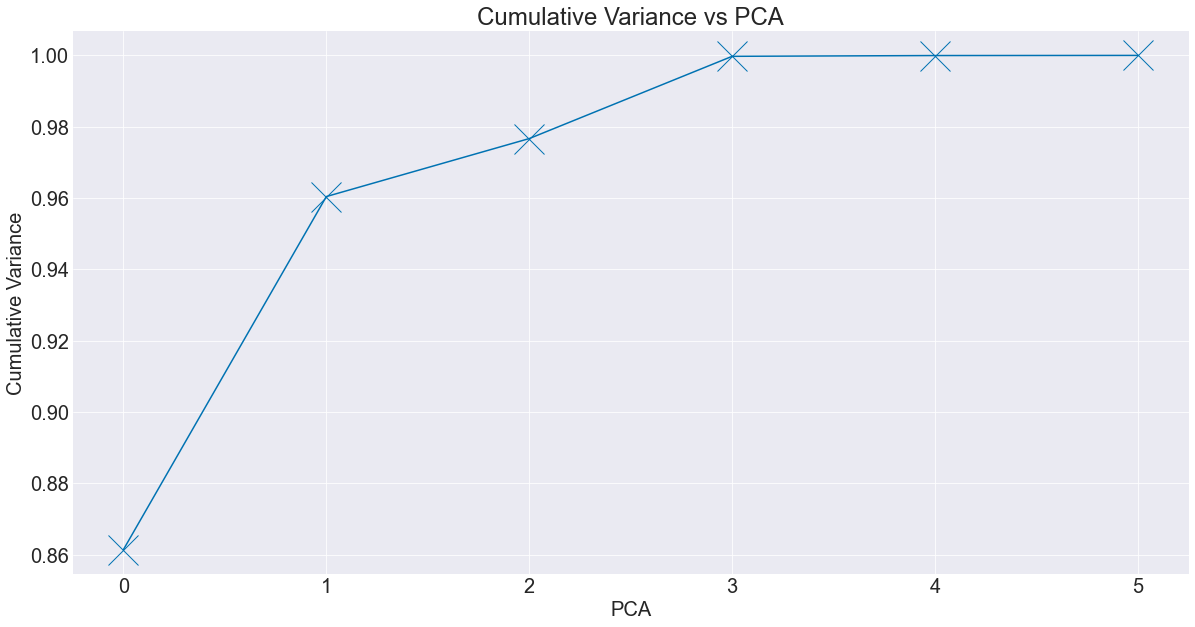

In [3]:
#Run pca with normalization = true because variables have different scales 
#Remove first column with the various species of fish
fish_headers = list(fish_df.columns[1:])

print(fish_headers)

pca_fish.pca(fish_headers, normalize = True)

# test elbow plot
pca_fish.elbow_plot()
plt.show()

**Findings**: The first 4 principle components explain 100% of the variance. I would drop the rest of the principle components

In [4]:
# pca project for fish data of first 5 pcs
num_dims = 2
pcs_to_keep = np.arange(num_dims)
fish_proj = pca_fish.pca_project(pcs_to_keep)
print(fish_proj.shape)

(159, 2)


Text(0.5, 1.0, 'PC2 vs PC1')

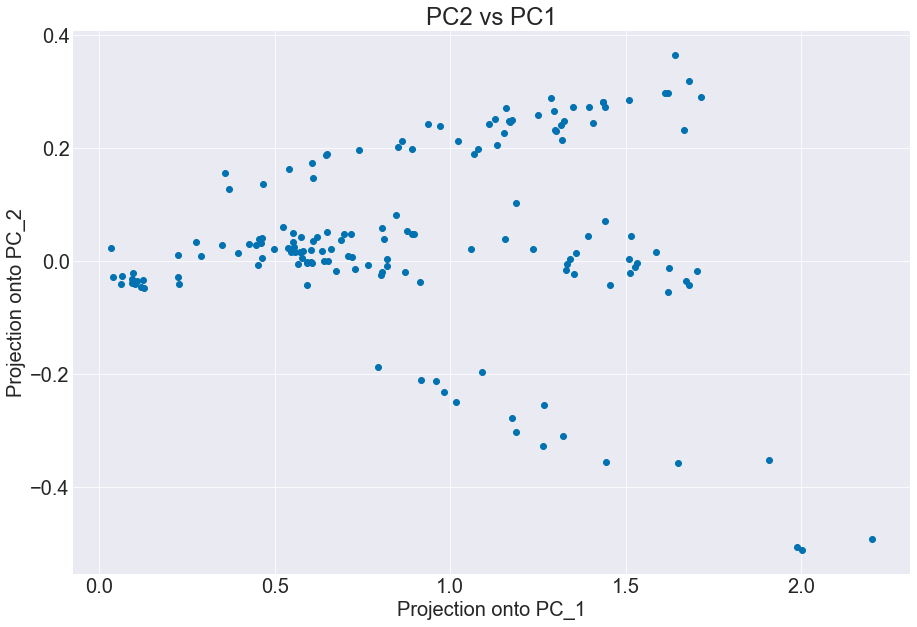

In [5]:
#scatter plot of pca projected on fish data on weight and height
plt.figure(figsize = (15,10))
plt.scatter(fish_proj[:,0], fish_proj[:,1])
plt.xlabel("Projection onto PC_1")
plt.ylabel("Projection onto PC_2")
plt.title("PC2 vs PC1")

## Reconstruct fish data based on PCs : 1, 2, 3, 4

Text(0.04, 0.5, 'Height')

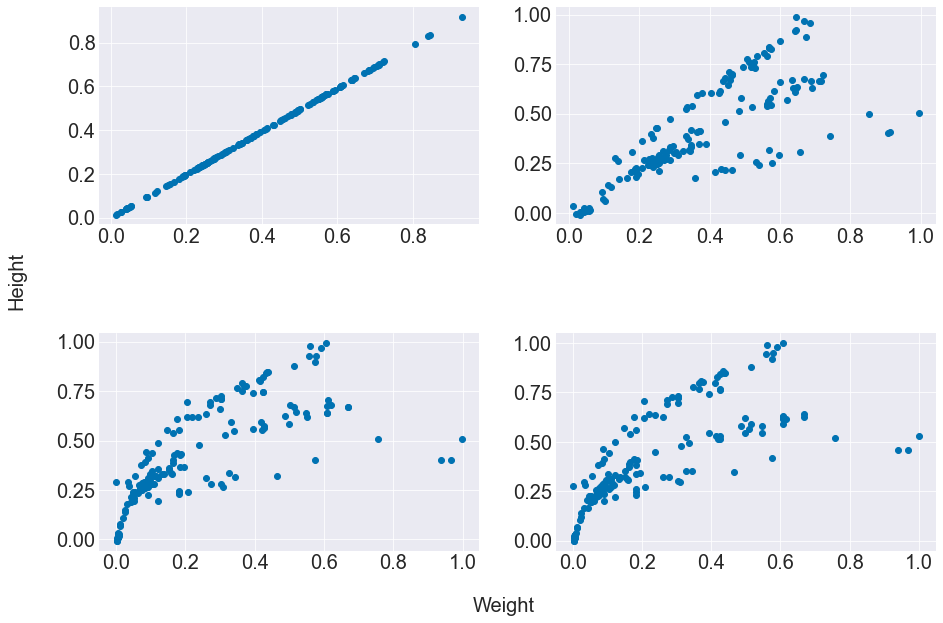

In [6]:
# 2x2 grid of scatter plots
#Plot original fish data
#Scatter plot of pca projected on normalized fish data 

fig, ax = plt.subplots(2, 2,figsize = (15,10))
plt.subplots_adjust(hspace = 0.5)

#Keep 1 PC
fish_proj_1 = pca_fish.pca_then_project_back(1)
ax[0,0].scatter(fish_proj_1[:,0], fish_proj_1[:,4])

#Keep 2 PCs
fish_proj_2 = pca_fish.pca_then_project_back(2)
ax[0,1].scatter(fish_proj_2[:,0], fish_proj_2[:,4])

#Keep 3 PCs
fish_proj_3 = pca_fish.pca_then_project_back(3)
ax[1,0].scatter(fish_proj_3[:,0], fish_proj_3[:,4])


#Keep 4 PCs
fish_proj_4 = pca_fish.pca_then_project_back(4)
ax[1,1].scatter(fish_proj_4[:,0], fish_proj_4[:,4])

#X and Y labels
fig.text(0.5, 0.04, 'Weight', ha='center')
fig.text(0.04, 0.5, 'Height', va='center', rotation='vertical')


Text(0.5, 1.0, 'Height vs Weight')

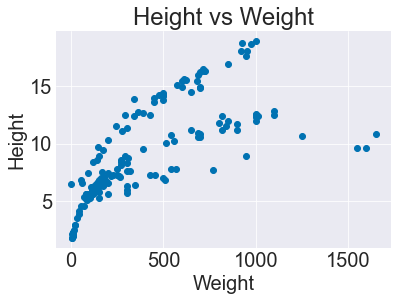

In [7]:
#plotting original dataset
plt.scatter(fish_df['Weight'], fish_df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Height vs Weight")


As seen from the plots above, keeping 4 PCs gets the original dataset back i.e. the bottom-right plot in the pair_plot matches very closely with the scatter plot above with weight as x-axis and height as y-axis. This further agrees with our intial observation that the top 4 principle components explain 100% of the variance in the data.

# 2. Image Compression
Compressed the lorikeet image from lab using the functions created in pca_cov.py instead of the inbuilt functions used during lab.

(678, 907, 4)


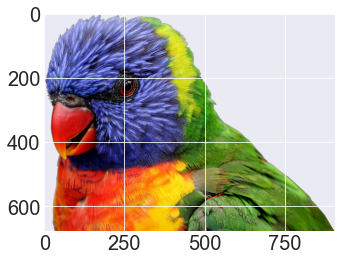

In [8]:
#compressing apples image from lab.
#import apples.png using imread
lorikeet = plt.imread('data/img/lorikeet.png')

#shape of lorikeet
print(lorikeet.shape)

#display image
plt.imshow(lorikeet)

In [9]:
#Preprocess lorikeet png image
#Reshape image for compression
lorikeet_vec = lorikeet.reshape(lorikeet.shape[0], -1)

#expect shape to be 678 by (907 * 4)
print(f'Shape of reshaped lorikeet image: {lorikeet_vec.shape}')

Shape of reshaped lorikeet image: (678, 3628)


In [10]:
#Perform PCA on preprocessed lorikeet image
lorikeet_df = pd.DataFrame(lorikeet_vec)

#create PCA_COV object to hold lorikeet image df
pca_lorikeet = pca_cov.PCA_COV(lorikeet_df)

#test how long it takes to run pca for vars = [0,1,...,3628] and get runtime
import time

start = time.time()

pca_lorikeet.pca(np.arange(0,3629))

end = time.time()

print(f'Time elapsed: {end - start}')

Time elapsed: 56.173439264297485


/Users/Collins/opt/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


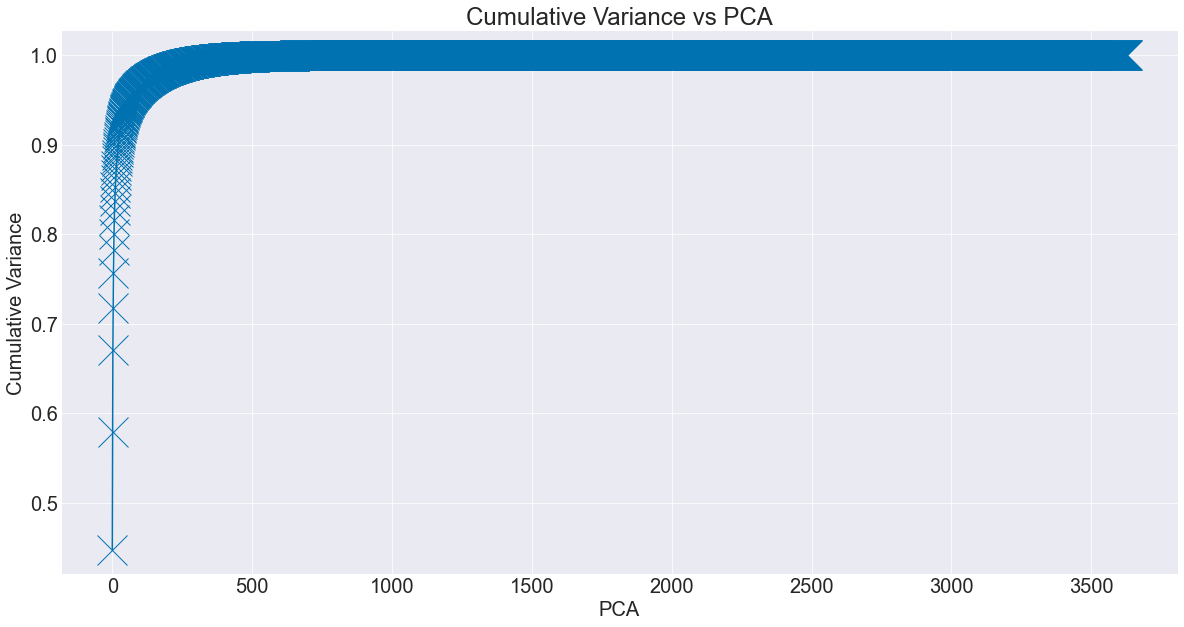

In [11]:
#Make apples PCA elbow plot
pca_lorikeet.elbow_plot()

Choose top pcs = 100 to visualize amount of variance explained more clearly as number of principle components increase. 

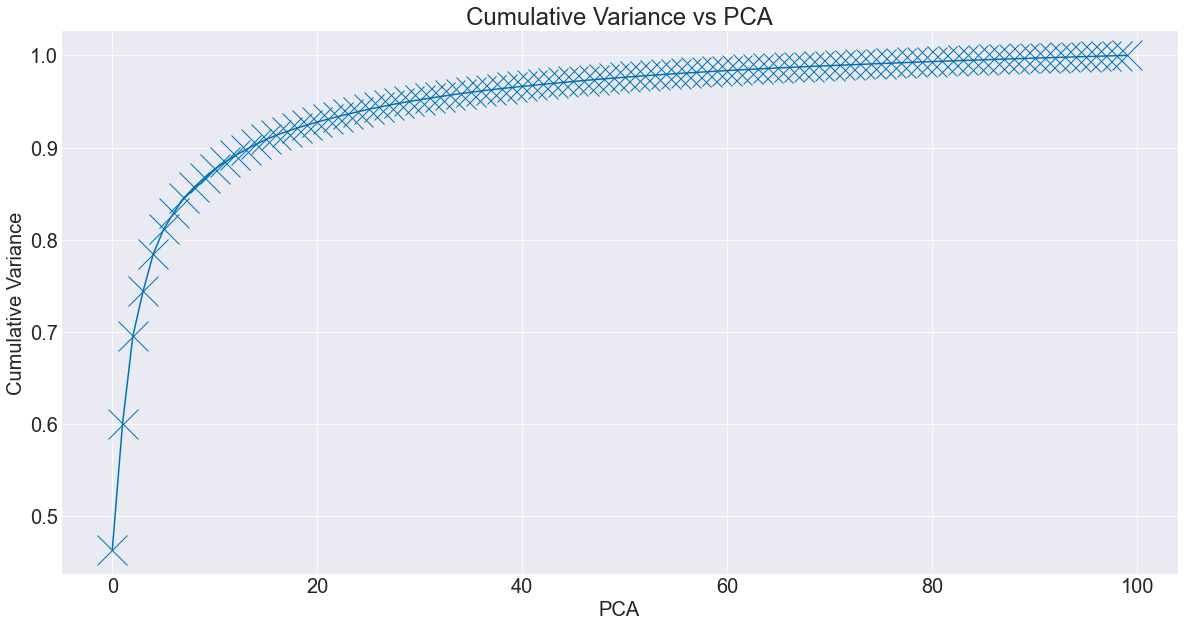

In [12]:
#Make apples PCA elbow plot, top 100 pcs
pca_lorikeet.elbow_plot(100)

The elbow plot shows that the top 60 principle components explain over 95% of the variance. I will reconstruct the lorikeet image using 60 principle components and calculate the compression ratio.

**Reconstruct lorikeet image using the principle components**

/Users/Collins/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(678, 3628)


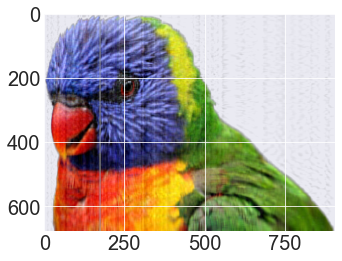

In [13]:
#Reconstruct lorikeet image with 60 pcs
reconstructed_lorikeet_img = pca_lorikeet.pca_then_project_back(60)

print(reconstructed_lorikeet_img.shape)

#clip values in reconstructed image to btwn 0 and 1
np.clip(reconstructed_lorikeet_img, 0, 1)

#reshape reconstructed image back to shape: 678 by 907 by 4
reshaped_lorikeet = reconstructed_lorikeet_img.reshape((reconstructed_lorikeet_img.shape[0], lorikeet.shape[1], lorikeet.shape[2]))


#display reconstructed lorikeet image with 60 pcs
plt.imshow(reshaped_lorikeet.astype(float))

In [14]:
#Compression ratio
#Compression ratio rate

compressed_size = reconstructed_lorikeet_img.shape[0] + reconstructed_lorikeet_img.shape[1]

print(f"Compressed_size: {compressed_size}")

uncompressed_size = (lorikeet.shape[0]*lorikeet.shape[1]*lorikeet.shape[2])

print(f"Uncompressed_size: {uncompressed_size}")

compression_ratio = compressed_size/uncompressed_size

print(f"Compression rate: {compression_ratio: 0.4f}")


Compressed_size: 4306
Uncompressed_size: 2459784
Compression rate:  0.0018
